# Wholesale Customer Segmentation Technical Document

In light of the numerous challenges confronting wholesale businesses, one effective approach to enhance value and reduce expenses is by optimizing the allocation of inventory and marketing resources to target audiences. 
Through this approach, XYZ could attract a larger customer base, helping them in promoting their products. We opted for customer segmentation using clustering techniques to assist us in analyzing customer spending behaviors and organizing them into meaningful groups.

# Set-up

To ready the data for analysis, we loaded the subsequent libraries and loaded the file 'Wholesale customers data.csv' into memory.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
df = pd.read_csv("Wholesale customers data.csv")

# Exploratory Data Analysis

1. Detecting patterns and relationships
2. Generating questions or hypotheses
3. Preparing data for modelling

In [4]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
df.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Other     316
Oporto     77
Lisbon     47
Name: Region, dtype: int64


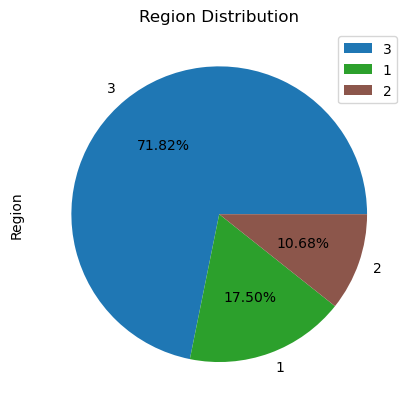

In [7]:
df_copy = df.copy()
# Convert number to meaningful information
df_copy['Region']=df_copy['Region'].map({3:'Other',2:'Lisbon',1:'Oporto'})
print(df_copy['Region'].value_counts())
# Create pie chart
plt.title('Region Distribution', fontsize=12)

df['Region'].value_counts().plot(kind='pie', colors=["tab:blue","tab:green", "tab:brown"] , autopct=lambda x: f'{x:.2f}%', legend=True)
plt.show()

Horeca    298
Retail    142
Name: Channel, dtype: int64


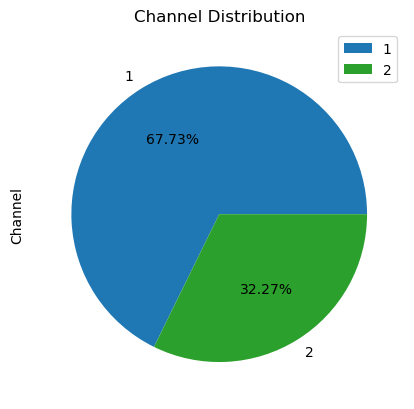

In [8]:
# Convert number to meaningful information
df_copy['Channel']=df_copy['Channel'].map({1:'Horeca',2:'Retail'})
print(df_copy['Channel'].value_counts())
# Create pie chart
plt.title('Channel Distribution', fontsize=12)

df['Channel'].value_counts().plot(kind='pie', colors=["tab:blue","tab:green"] , autopct=lambda x: f'{x:.2f}%', legend=True)
plt.show()

<AxesSubplot:>

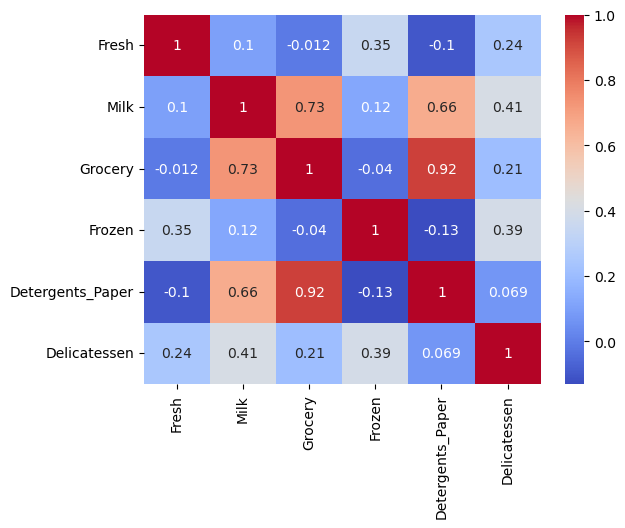

In [9]:
# correlation 
corr_matrix=df_copy.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

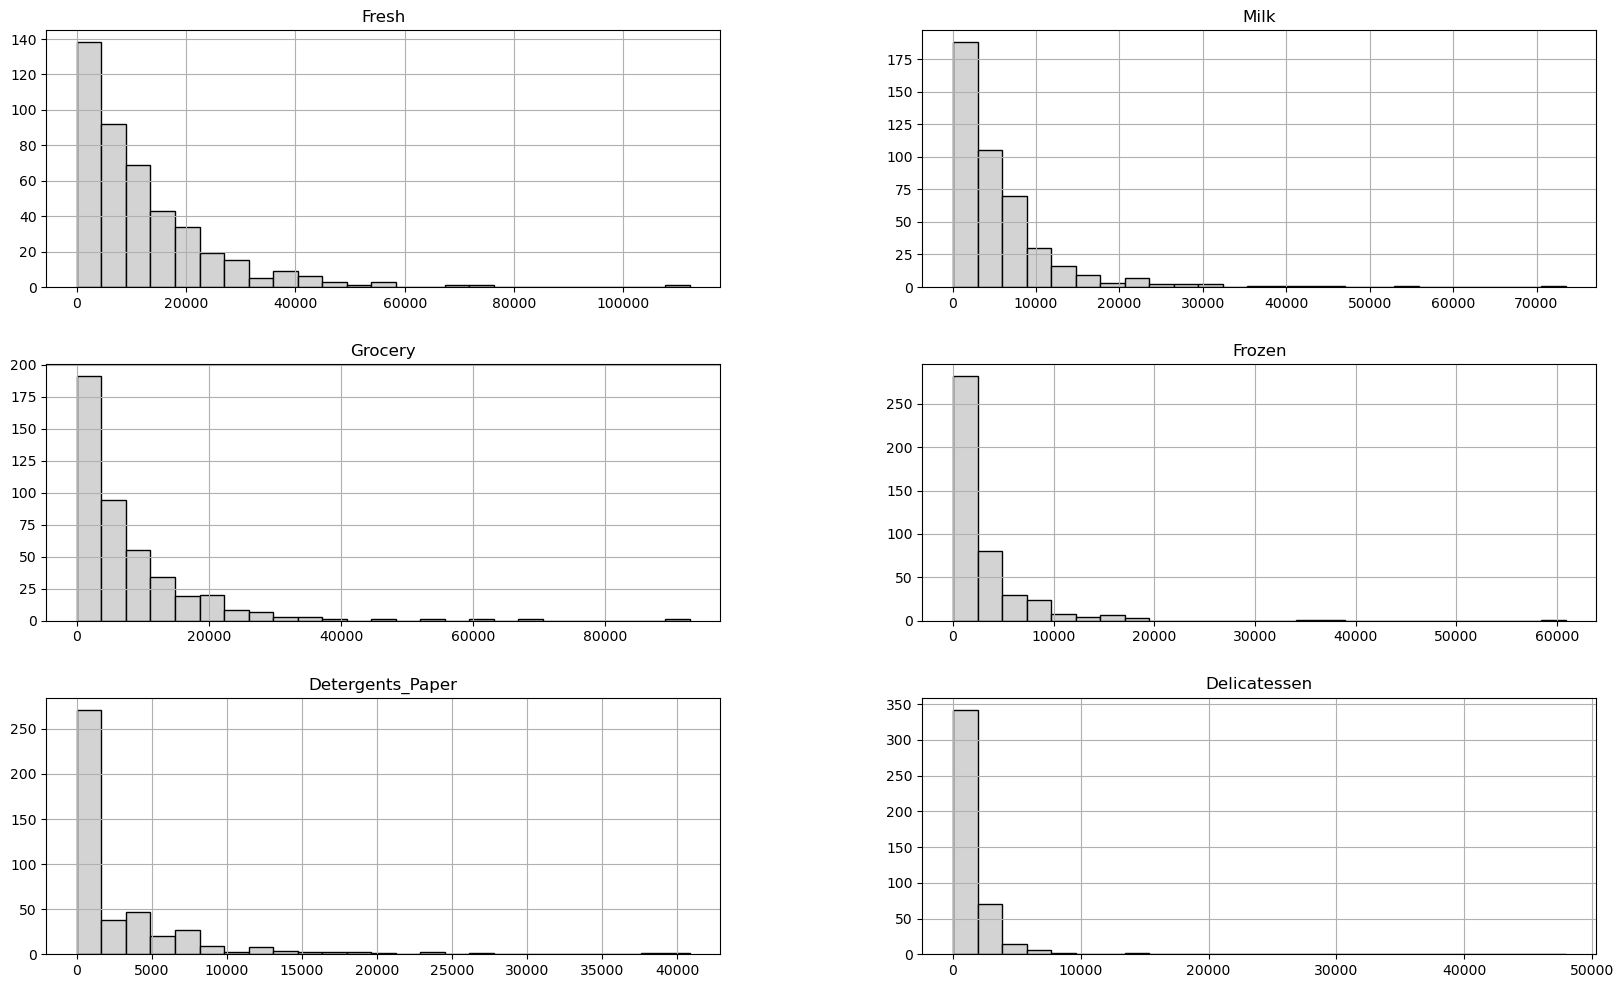

In [10]:
df_copy.hist(figsize=(20,12),bins=25, color='lightgray', edgecolor='black')
plt.show()

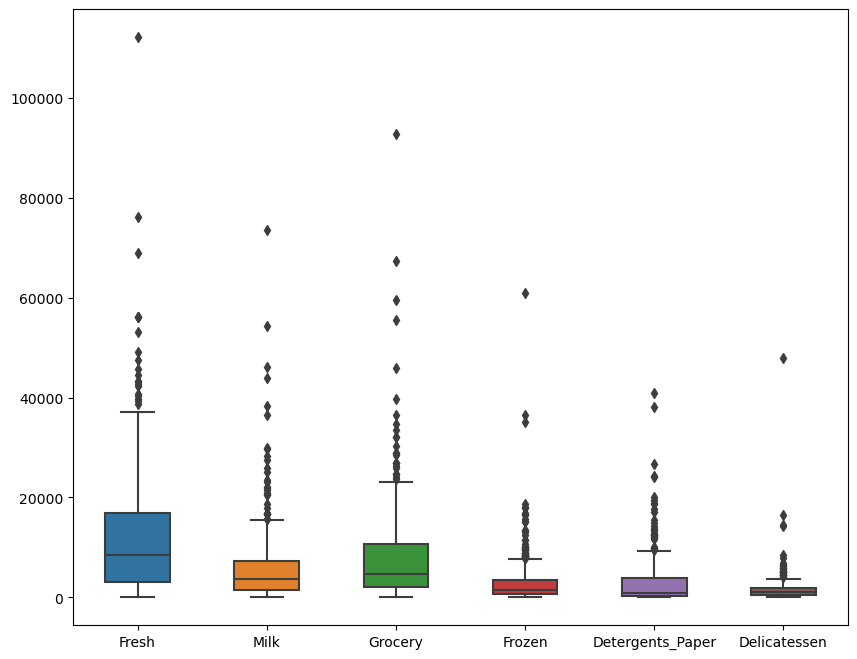

In [11]:
# Distribution of different products
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_copy[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
            , width=0.5)
plt.show()

# K-means Clustering

From the data visualization above, we can find that the data tend to be right-skewed and contains lots of outliers. 
Since K-means clustering is vulnerable to outliers in the data, here we need to do preprocessing to standardize our data first. 

In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [13]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


### Elbow method for determining the optimal number of clusters:

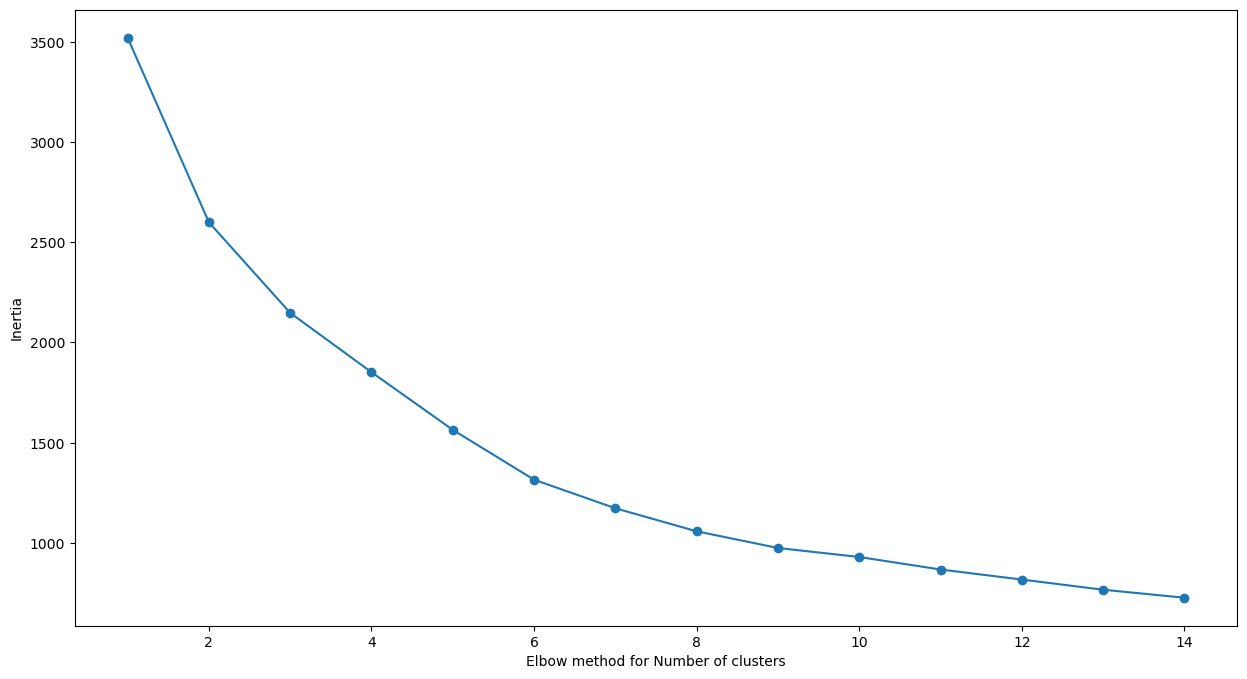

In [14]:
SSE = []
for i in range(1,15):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(15,8))
plt.plot(frame['Cluster'], frame['SSE'], marker="o")
plt.xlabel('Elbow method for Number of clusters')
plt.ylabel('Inertia')
plt.style.use('bmh')
plt.show()

Based on the SSE curve, we identified that anywhere from 4 to 8 clusters seemed to be a good range. Specifically, we choose k = 5 and do the following clustering.

In [15]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)
cl = kmeans.predict(data_scaled)
print(cl)

[0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 3 0 0 2 2 0 2 2 2 2 2 2 0 2
 0 0 2 2 2 0 0 0 0 0 3 0 0 2 2 0 0 2 2 3 0 2 2 0 3 0 0 2 3 2 0 2 2 2 2 2 0
 0 2 2 0 2 2 2 0 0 2 0 3 3 2 2 2 2 2 3 2 0 2 0 2 2 2 0 0 0 2 2 2 0 0 0 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 4 2
 2 2 2 0 0 2 2 2 0 2 2 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 3 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 3 1 0 1 1 1 1 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 0 0 2 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2]


In [16]:
frame = pd.DataFrame(data_scaled)

# add the cluster column to dataset
df_kmeans = df.copy()
df_kmeans['cluster'] = cl
df_kmeans['cluster'].value_counts()

2    211
0    125
1     92
3     11
4      1
Name: cluster, dtype: int64

### Display the determined clusters along with dataset

In [17]:
#cluster profiles
df_kmeans.head(30)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,0
6,2,3,12126,3199,6975,480,3140,545,0
7,2,3,7579,4956,9426,1669,3321,2566,0
8,1,3,5963,3648,6192,425,1716,750,2
9,2,3,6006,11093,18881,1159,7425,2098,0


<Figure size 1000x1000 with 0 Axes>

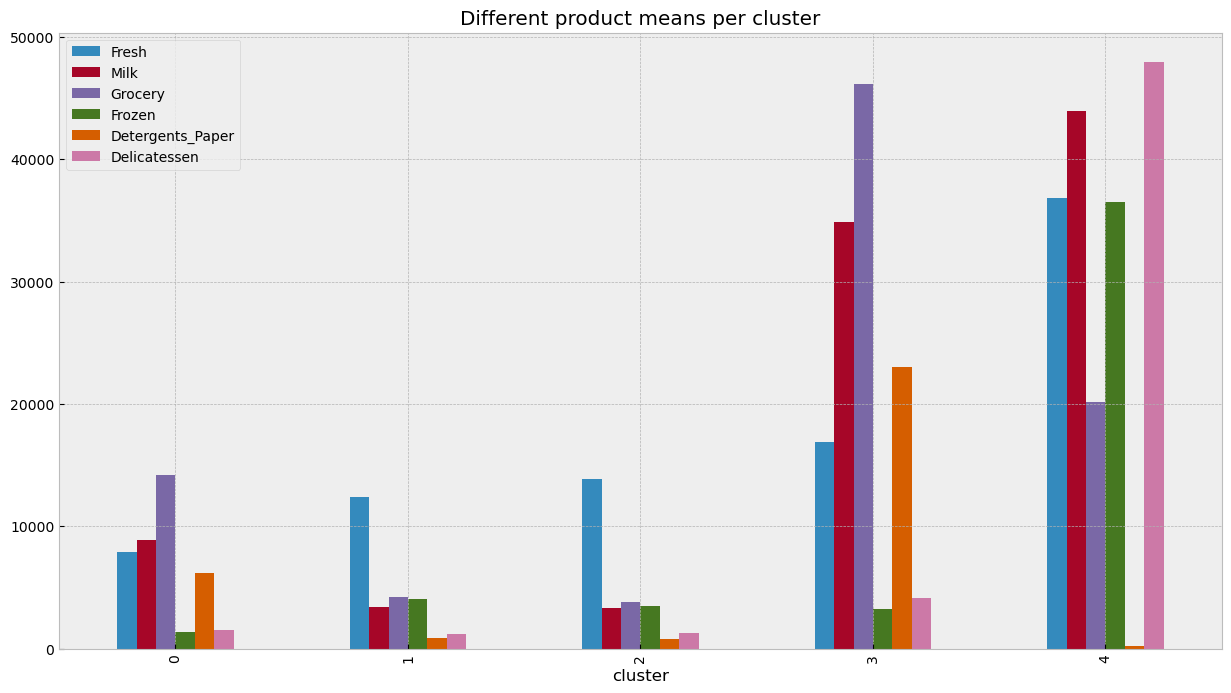

In [18]:
means=df_kmeans.iloc[:,2:].groupby('cluster').mean()

plt.figure(figsize=(10,10))
means.groupby('cluster').mean().plot(kind='bar', figsize=(15,8), legend = True)

legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')  
    
plt.title('Different product means per cluster')
plt.show()